In [2]:
#importing important packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.special import logsumexp

# 1. Eco-inspired Indicators

# Basecase (Linear Economy)

In [3]:
#GitHub CSV file URL
basecase_csv_url = 'https://raw.githubusercontent.com/FarshidNazemi/ENA/main/data/Basecase%20(linear%20Economy).csv'
# Read CSV file, skip first two rows, and drop first two columns
df_basecase = pd.read_csv(basecase_csv_url, header=None, skiprows=2)
df_basecase = df_basecase.iloc[:, 2:]

# Building the total flow matrix
R = df_basecase.to_numpy()

#Internal Flow Matrix (F)

# Get the dimensions of the matrix
rows, cols = R.shape

# Specify how many rows and columns to remove
rows_to_remove = 4
cols_to_remove = 4

# Remove the last rows and columns
if rows_to_remove > 0 and cols_to_remove > 0:
    F = R[:rows - rows_to_remove, :cols - cols_to_remove]

#consumer demand (functional unit)
FU = F[1,2] #1 metric ton

#virgin input vector (Z)
# Get the fourth row from the end and store it in a vector
Z = R[-4]
Z = Z[:-4]

#Recovered input vector (P)
# Get the fourth row from the end and store it in a vector
P = R[-3]
P = P[:-4]

#Dissipation vector (Y)
# Get the fourth row from the end and store it in a vector
Y = R[:,-2]
Y = Y[:-4]

#Export vector (E)
# Get the fourth row from the end and store it in a vector
E = R[:,-1]
E = E[:-4]

#number of compartments
n=len(F)

#Total boundary input
TBI = np.sum(Z) + np.sum(P)

#Total Input (Output) Throughflows
T_i = np.sum(F, axis=0) + Z + P

#Flow Analysis (identifies non-dimentional flow intensities along indirect pathways)
epsilon = 1e-10
G = F/(T_i + epsilon)

#Dimentionless Integral intensities matrix
I=np.identity(n,dtype='float64')
N=np.linalg.inv(I-G)

#Development capacity
DC = 0.0

for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))
            
#Ascendency
ASC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            ASC += numerator * np.log2((numerator*np.sum(R) / denominator) + epsilon)

#Redundancy
PHI = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            PHI += -numerator * np.log2((numerator**2 / denominator) + epsilon)

#Development capacity
DC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))

#Ratio of ascendency to development capacity
R_ASC = ASC / DC

#Total System Throughflow
TST_flow = np.sum(F)
print("Total System Throughflows (TST) =", TST_flow)

#Network Intensity
NI = TST_flow/FU
print("Network Intensity (NI) =", NI)

#Robustness
ecological_resilience = -R_ASC*math.log(R_ASC)
Robustness = ecological_resilience/0.3678
print("Robustness =", Robustness)

#Mean Circularity Level (MCL)
m=8
Num=0.0
Denom=0.0
MTL=0.0
#Circularity Levels (CL): 1: Litter 2: Landfill 3: Energy Recovery/Compost 4: Open-loop recovery
#5: Refurbish/Recycle 6: Redistribute 7: Reuse 8: Refuse/Rethink
BLi=[0, #1: Litter
    T_i[4], #2: Landfill
     0, #3: Energy Recovery/Compost
     0, #4: Open-loop Recovery
     0, #5: Refursbish/Recycle
     0, #6: Redistribute
     0, #7: Reuse
     0 #8: Refuse/Rethink
    ]
CLi=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in range (m):
    Num=Num+BLi[i]*CLi[i]
    Denom=Denom+BLi[i]
MCL=Num/Denom
MCL=(MCL-1)/(8-1) #Normalizing
print ("Mean Circularity Level =", MCL)

#Loop Tightness
FU_c=(N[2,2]-1)/(N[2,2]+epsilon)*T_i[2]
LT=FU_c/FU
print ("Loop Tightness =", LT)

#Detritivory to herbivory ratio
D_H = 0 #no recovery
print("Detritivory to herbivory ratio (D:H) =", D_H)

#Resource Consumption Efficiency
RCE = FU/(np.sum(Z)+epsilon)
print("Resource Consumption Efficiency (RCE) =", RCE)

#EMF's Material Circularity Indicator (MCI)
V = 1.111    #Ratio of product composition from virgin material
W = 1.0555    #Waste (including production waste)
M = 1    #Mass of Product
MCI = 1 - (V+W)/(2*M)
if MCI<0:   #Normalizing MCI to a value between 0 and 1
    MCI=0
elif MCI>1:
        MCI=1
print("Material Circularity Indicator (MCI) =", MCI)

Total System Throughflows (TST) = 4.0555
Network Intensity (NI) = 4.0555
Robustness = 0.196043977287096
Mean Circularity Level = 0.14285714285714285
Loop Tightness = 0.0
Detritivory to herbivory ratio (D:H) = 0
Resource Consumption Efficiency (RCE) = 0.9000900089198839
Material Circularity Indicator (MCI) = 0


# Reuse

In [4]:
#GitHub CSV file URL
basecase_csv_url = 'https://raw.githubusercontent.com/FarshidNazemi/ENA/main/data/Reuse.csv'
# Read CSV file, skip first two rows, and drop first two columns
df_basecase = pd.read_csv(basecase_csv_url, header=None, skiprows=2)
df_basecase = df_basecase.iloc[:, 2:]

# Building the total flow matrix
R = df_basecase.to_numpy()

#Internal Flow Matrix (F)

# Get the dimensions of the matrix
rows, cols = R.shape

# Specify how many rows and columns to remove
rows_to_remove = 4
cols_to_remove = 4

# Remove the last rows and columns
if rows_to_remove > 0 and cols_to_remove > 0:
    F = R[:rows - rows_to_remove, :cols - cols_to_remove]

#consumer demand (functional unit)
FU = F[1,2]+F[3,2] #1 metric ton

#virgin input vector (Z)
# Get the fourth row from the end and store it in a vector
Z = R[-4]
Z = Z[:-4]

#Recovered input vector (P)
# Get the fourth row from the end and store it in a vector
P = R[-3]
P = P[:-4]

#Dissipation vector (Y)
# Get the fourth row from the end and store it in a vector
Y = R[:,-2]
Y = Y[:-4]

#Export vector (E)
# Get the fourth row from the end and store it in a vector
E = R[:,-1]
E = E[:-4]

#number of compartments
n=len(F)

#Total boundary input
TBI = np.sum(Z) + np.sum(P)

#Total Input (Output) Throughflows
T_i = np.sum(F, axis=0) + Z + P

#Flow Analysis (identifies non-dimentional flow intensities along indirect pathways)
epsilon = 1e-10
G = F/(T_i + epsilon)

#Dimentionless Integral intensities matrix
I=np.identity(n,dtype='float64')
N=np.linalg.inv(I-G)

#Development capacity
DC = 0.0

for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))
            
#Ascendency
ASC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            ASC += numerator * np.log2((numerator*np.sum(R) / denominator) + epsilon)

#Redundancy
PHI = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            PHI += -numerator * np.log2((numerator**2 / denominator) + epsilon)

#Development capacity
DC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))

#Ratio of ascendency to development capacity
R_ASC = ASC / DC

#Total System Throughflow
TST_flow = np.sum(F)
print("Total System Throughflows (TST) =", TST_flow)

#Network Intensity
NI = TST_flow/FU
print("Network Intensity (NI) =", NI)

#Robustness
ecological_resilience = -R_ASC*math.log(R_ASC)
Robustness = ecological_resilience/0.3678
print("Robustness =", Robustness)

#Mean Circularity Level (MCL)
m=8
Num=0.0
Denom=0.0
MTL=0.0
#Circularity Levels (CL): 1: Litter 2: Landfill 3: Energy Recovery/Compost 4: Open-loop recovery
#5: Refurbish/Recycle 6: Redistribute 7: Reuse 8: Refuse/Rethink
BLi=[0, #1: Litter
    T_i[4], #2: Landfill
     0, #3: Energy Recovery/Compost
     0, #4: Open-loop Recovery
     0, #5: Refursbish/Recycle
     0, #6: Redistribute
     T_i[3], #7: Reuse
     0 #8: Refuse/Rethink
    ]
CLi=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in range (m):
    Num=Num+BLi[i]*CLi[i]
    Denom=Denom+BLi[i]
MCL=Num/Denom
MCL=(MCL-1)/(8-1) #Normalizing
print ("Mean Circularity Level =", MCL)

#Loop Tightness
FU_c=(N[2,2]-1)/(N[2,2]+epsilon)*T_i[2]
LT=FU_c/FU
print ("Loop Tightness =", LT)

#Detritivory to herbivory ratio
D_H = F[3,2]/np.sum(Z) #no recovery
print("Detritivory to herbivory ratio (D:H) =", D_H)

#Resource Consumption Efficiency
RCE = FU/(np.sum(Z)+epsilon)
print("Resource Consumption efficiency (RCE) =", RCE)

#EMF's Material Circularity Indicator
V = 0.222    #Ratio of product composition from virgin material
W = 0.161    #Waste (excluding production waste)
M = 1    #Mass of Product
MCI = 1 - (V+W)/(2*M)
if MCI<0:   #Normalizing MCI to a value between 0 and 1
    MCI=0
elif MCI>1:
        MCI=1
print("Material Circularity Indicator (MCI) =", MCI)

Total System Throughflows (TST) = 2.3609999999999998
Network Intensity (NI) = 2.3609999999999998
Robustness = 0.6557473807916919
Mean Circularity Level = 0.7580903162298511
Loop Tightness = 0.799999999824
Detritivory to herbivory ratio (D:H) = 3.6036036036036037
Resource Consumption efficiency (RCE) = 4.504504502475448
Material Circularity Indicator (MCI) = 0.8085


# Recycle

In [5]:
#GitHub CSV file URL
basecase_csv_url = 'https://raw.githubusercontent.com/FarshidNazemi/ENA/main/data/Recycle.csv'
# Read CSV file, skip first two rows, and drop first two columns
df_basecase = pd.read_csv(basecase_csv_url, header=None, skiprows=2)
df_basecase = df_basecase.iloc[:, 2:]

# Building the total flow matrix
R = df_basecase.to_numpy()

#Internal Flow Matrix (F)

# Get the dimensions of the matrix
rows, cols = R.shape

# Specify how many rows and columns to remove
rows_to_remove = 4
cols_to_remove = 4

# Remove the last rows and columns
if rows_to_remove > 0 and cols_to_remove > 0:
    F = R[:rows - rows_to_remove, :cols - cols_to_remove]

#consumer demand (functional unit)
FU = F[1,2] #1 metric ton

#virgin input vector (Z)
# Get the fourth row from the end and store it in a vector
Z = R[-4]
Z = Z[:-4]

#Recovered input vector (P)
# Get the fourth row from the end and store it in a vector
P = R[-3]
P = P[:-4]

#Dissipation vector (Y)
# Get the fourth row from the end and store it in a vector
Y = R[:,-2]
Y = Y[:-4]

#Export vector (E)
# Get the fourth row from the end and store it in a vector
E = R[:,-1]
E = E[:-4]

#number of compartments
n=len(F)

#Total boundary input
TBI = np.sum(Z) + np.sum(P)

#Total Input (Output) Throughflows
T_i = np.sum(F, axis=0) + Z + P

#Flow Analysis (identifies non-dimentional flow intensities along indirect pathways)
epsilon = 1e-10
G = F/(T_i + epsilon)

#Dimentionless Integral intensities matrix
I=np.identity(n,dtype='float64')
N=np.linalg.inv(I-G)

#Development capacity
DC = 0.0

for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))
            
#Ascendency
ASC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            ASC += numerator * np.log2((numerator*np.sum(R) / denominator) + epsilon)

#Redundancy
PHI = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            PHI += -numerator * np.log2((numerator**2 / denominator) + epsilon)

#Development capacity
DC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))

#Ratio of ascendency to development capacity
R_ASC = ASC / DC

#Total System Throughflow
TST_flow = np.sum(F)
print("Total System Throughflows (TST) =", TST_flow)

#Network Intensity
NI = TST_flow/FU
print("Network Intensity (NI) =", NI)

#Robustness
ecological_resilience = -R_ASC*math.log(R_ASC)
Robustness = ecological_resilience/0.3678
print("Robustness =", Robustness)

#Mean Circularity Level (MCL)
m=8
Num=0.0
Denom=0.0
MTL=0.0
#Circularity Levels (CL): 1: Litter 2: Landfill 3: Energy Recovery/Compost 4: Open-loop recovery
#5: Refurbish/Recycle 6: Redistribute 7: Reuse 8: Refuse/Rethink
BLi=[0, #1: Litter
    T_i[5], #2: Landfill
     0, #3: Energy Recovery/Compost
     0, #4: Open-loop Recovery
     T_i[4], #5: Refursbish/Recycle
     0, #6: Redistribute
     0, #7: Reuse
     0 #8: Refuse/Rethink
    ]
CLi=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in range (m):
    Num=Num+BLi[i]*CLi[i]
    Denom=Denom+BLi[i]
MCL=Num/Denom
MCL=(MCL-1)/(8-1) #Normalizing
print ("Mean Circularity Level =", MCL)

#Loop Tightness
FU_c=(N[2,2]-1)/(N[2,2]+epsilon)*T_i[2]
LT=FU_c/FU
print ("Loop Tightness =", LT)

#Detritivory to herbivory ratio
D_H = F[4,0]/np.sum(Z) #no recovery
print("Detritivory to herbivory ratio (D:H) =", D_H)

#Resource Consumption Efficiency
RCE = FU/(np.sum(Z)+epsilon)
print("Resource Consumption efficiency (RCE) =", RCE)

#EMF's Material Circularity Indicator
V = 0.311    #Ratio of product composition from virgin material
W = 0.206    #Waste (excluding production waste)
M = 1    #Mass of Product
MCI = 1 - (V+W)/(2*M)
if MCI<0:   #Normalizing MCI to a value between 0 and 1
    MCI=0
elif MCI>1:
        MCI=1
print("Material Circularity Indicator (MCI) =", MCI)

Total System Throughflows (TST) = 5.006
Network Intensity (NI) = 5.006
Robustness = 0.4544968164858298
Mean Circularity Level = 0.4982231698649609
Loop Tightness = 0.7200720068277215
Detritivory to herbivory ratio (D:H) = 2.572347266881029
Resource Consumption efficiency (RCE) = 3.2154340825673846
Material Circularity Indicator (MCI) = 0.7415


# Downcycle

In [6]:
#GitHub CSV file URL
basecase_csv_url = 'https://raw.githubusercontent.com/FarshidNazemi/ENA/main/data/Downcycle.csv'
# Read CSV file, skip first two rows, and drop first two columns
df_basecase = pd.read_csv(basecase_csv_url, header=None, skiprows=2)
df_basecase = df_basecase.iloc[:, 2:]

# Building the total flow matrix
R = df_basecase.to_numpy()

#Internal Flow Matrix (F)

# Get the dimensions of the matrix
rows, cols = R.shape

# Specify how many rows and columns to remove
rows_to_remove = 4
cols_to_remove = 4

# Remove the last rows and columns
if rows_to_remove > 0 and cols_to_remove > 0:
    F = R[:rows - rows_to_remove, :cols - cols_to_remove]

#consumer demand (functional unit)
FU = F[1,2] #1 metric ton

#virgin input vector (Z)
# Get the fourth row from the end and store it in a vector
Z = R[-4]
Z = Z[:-4]

#Recovered input vector (P)
# Get the fourth row from the end and store it in a vector
P = R[-3]
P = P[:-4]

#Dissipation vector (Y)
# Get the fourth row from the end and store it in a vector
Y = R[:,-2]
Y = Y[:-4]

#Export vector (E)
# Get the fourth row from the end and store it in a vector
E = R[:,-1]
E = E[:-4]

#number of compartments
n=len(F)

#Total boundary input
TBI = np.sum(Z) + np.sum(P)

#Total Input (Output) Throughflows
T_i = np.sum(F, axis=0) + Z + P

#Flow Analysis (identifies non-dimentional flow intensities along indirect pathways)
epsilon = 1e-10
G = F/(T_i + epsilon)

#Dimentionless Integral intensities matrix
I=np.identity(n,dtype='float64')
N=np.linalg.inv(I-G)

#Development capacity
DC = 0.0

for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))
            
#Ascendency
ASC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            ASC += numerator * np.log2((numerator*np.sum(R) / denominator) + epsilon)

#Redundancy
PHI = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            PHI += -numerator * np.log2((numerator**2 / denominator) + epsilon)

#Development capacity
DC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))

#Ratio of ascendency to development capacity
R_ASC = ASC / DC

#Total System Throughflow
TST_flow = np.sum(F)
print("Total System Throughflows (TST) =", TST_flow)

#Network Intensity
NI = TST_flow/FU
print("Network Intensity (NI) =", NI)

#Robustness
ecological_resilience = -R_ASC*math.log(R_ASC)
Robustness = ecological_resilience/0.3678
print("Robustness =", Robustness)

#Mean Circularity Level (MCL)
m=8
Num=0.0
Denom=0.0
MTL=0.0
#Circularity Levels (CL): 1: Litter 2: Landfill 3: Energy Recovery/Compost 4: Open-loop recovery
#5: Refurbish/Recycle 6: Redistribute 7: Reuse 8: Refuse/Rethink
BLi=[0, #1: Litter
    T_i[5], #2: Landfill
     0, #3: Energy Recovery/Compost
     T_i[4], #4: Open-loop Recovery
     0, #5: Refursbish/Recycle
     0, #6: Redistribute
     0, #7: Reuse
     0 #8: Refuse/Rethink
    ]
CLi=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in range (m):
    Num=Num+BLi[i]*CLi[i]
    Denom=Denom+BLi[i]
MCL=Num/Denom
MCL=(MCL-1)/(8-1) #Normalizing
print ("Mean Circularity Level =", MCL)

#Loop Tightness
FU_c=(N[2,2]-1)/(N[2,2]+epsilon)*T_i[2]
LT=FU_c/FU
print ("Loop Tightness =", LT)

#Detritivory to herbivory ratio
D_H = E[4]/np.sum(Z) #no recovery
print("Detritivory to herbivory ratio (D:H) =", D_H)

#Resource Consumption Efficiency
RCE = FU/(np.sum(Z)+epsilon)
print("Resource Consumption efficiency (RCE) =", RCE)

#EMF's Material Circularity Indicator
V = 1.111    #Ratio of product composition from virgin material
W = 0.206    #Waste (excluding production waste)
M = 1    #Mass of Product
MCI = 1 - (V+W)/(2*M)
if MCI<0:   #Normalizing MCI to a value between 0 and 1
    MCI=0
elif MCI>1:
        MCI=1
print("Material Circularity Indicator (MCI) =", MCI)

Total System Throughflows (TST) = 4.206
Network Intensity (NI) = 4.206
Robustness = 0.2830346587166525
Mean Circularity Level = 0.37976782752902155
Loop Tightness = 0.0
Detritivory to herbivory ratio (D:H) = 0.7200720072007201
Resource Consumption efficiency (RCE) = 0.9000900089198839
Material Circularity Indicator (MCI) = 0.3415


# Diverse EoL

In [7]:
#GitHub CSV file URL
basecase_csv_url = 'https://raw.githubusercontent.com/FarshidNazemi/ENA/main/data/Diverse%20EoL.csv'
# Read CSV file, skip first two rows, and drop first two columns
df_basecase = pd.read_csv(basecase_csv_url, header=None, skiprows=2)
df_basecase = df_basecase.iloc[:, 2:]

# Building the total flow matrix
R = df_basecase.to_numpy()

#Internal Flow Matrix (F)

# Get the dimensions of the matrix
rows, cols = R.shape

# Specify how many rows and columns to remove
rows_to_remove = 4
cols_to_remove = 4

# Remove the last rows and columns
if rows_to_remove > 0 and cols_to_remove > 0:
    F = R[:rows - rows_to_remove, :cols - cols_to_remove]

#consumer demand (functional unit)
FU = F[1,2] + F[4,2] #1 metric ton

#virgin input vector (Z)
# Get the fourth row from the end and store it in a vector
Z = R[-4]
Z = Z[:-4]

#Recovered input vector (P)
# Get the fourth row from the end and store it in a vector
P = R[-3]
P = P[:-4]

#Dissipation vector (Y)
# Get the fourth row from the end and store it in a vector
Y = R[:,-2]
Y = Y[:-4]

#Export vector (E)
# Get the fourth row from the end and store it in a vector
E = R[:,-1]
E = E[:-4]

#number of compartments
n=len(F)

#Total boundary input
TBI = np.sum(Z) + np.sum(P)

#Total Input (Output) Throughflows
T_i = np.sum(F, axis=0) + Z + P

#Flow Analysis (identifies non-dimentional flow intensities along indirect pathways)
epsilon = 1e-10
G = F/(T_i + epsilon)

#Dimentionless Integral intensities matrix
I=np.identity(n,dtype='float64')
N=np.linalg.inv(I-G)

#Development capacity
DC = 0.0

for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))
            
#Ascendency
ASC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            ASC += numerator * np.log2((numerator*np.sum(R) / denominator) + epsilon)

#Redundancy
PHI = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            PHI += -numerator * np.log2((numerator**2 / denominator) + epsilon)

#Development capacity
DC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))

#Ratio of ascendency to development capacity
R_ASC = ASC / DC

#Total System Throughflow
TST_flow = np.sum(F)
print("Total System Throughflows (TST) =", TST_flow)

#Network Intensity
NI = TST_flow/FU
print("Network Intensity (NI) =", NI)

#Robustness
ecological_resilience = -R_ASC*math.log(R_ASC)
Robustness = ecological_resilience/0.3678
print("Robustness =", Robustness)

#Mean Circularity Level (MCL)
m=8
Num=0.0
Denom=0.0
MTL=0.0
#Circularity Levels (CL): 1: Litter 2: Landfill 3: Energy Recovery/Compost 4: Open-loop recovery
#5: Refurbish/Recycle 6: Redistribute 7: Reuse 8: Refuse/Rethink
BLi=[0, #1: Litter
    T_i[7], #2: Landfill
     0, #3: Energy Recovery/Compost
     T_i[6], #4: Open-loop Recovery
     T_i[5], #5: Refursbish/Recycle
     0, #6: Redistribute
     T_i[4], #7: Reuse
     0 #8: Refuse/Rethink
    ]
CLi=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in range (m):
    Num=Num+BLi[i]*CLi[i]
    Denom=Denom+BLi[i]
MCL=Num/Denom
MCL=(MCL-1)/(8-1) #Normalizing
print ("Mean Circularity Level =", MCL)

#Loop Tightness
FU_c=(N[2,2]-1)/(N[2,2]+epsilon)*T_i[2]
LT=FU_c/FU
print ("Loop Tightness =", LT)

#Detritivory to herbivory ratio
D_H = (E[6]+F[4,2]+F[5,0])/np.sum(Z) #no recovery
print("Detritivory to herbivory ratio (D:H) =", D_H)

#Resource Consumption Efficiency
RCE = FU/(np.sum(Z)+epsilon)
print("Resource Consumption efficiency (RCE) =", RCE)

#EMF's Material Circularity Indicator
V = 0.466    #Ratio of product composition from virgin material
W = 0.183    #Waste (excluding production waste)
M = 1    #Mass of Product
MCI = 1 - (V+W)/(2*M)
if MCI<0:   #Normalizing MCI to a value between 0 and 1
    MCI=0
elif MCI>1:
        MCI=1
print("Material Circularity Indicator (MCI) =", MCI)

Total System Throughflows (TST) = 3.6830000000000003
Network Intensity (NI) = 3.6830000000000003
Robustness = 0.740273301352754
Mean Circularity Level = 0.5921908893709328
Loop Tightness = 0.5801801798526128
Detritivory to herbivory ratio (D:H) = 1.7167381974248928
Resource Consumption efficiency (RCE) = 2.1459227463206174
Material Circularity Indicator (MCI) = 0.6755


# Refuse

In [10]:
#GitHub CSV file URL
basecase_csv_url = 'https://raw.githubusercontent.com/FarshidNazemi/ENA/main/data/Refuse.csv'
# Read CSV file, skip first two rows, and drop first two columns
df_basecase = pd.read_csv(basecase_csv_url, header=None, skiprows=2)
df_basecase = df_basecase.iloc[:, 2:]

# Building the total flow matrix
R = df_basecase.to_numpy()
F_R = 0.8 #refusal flow
#Internal Flow Matrix (F)

# Get the dimensions of the matrix
rows, cols = R.shape

# Specify how many rows and columns to remove
rows_to_remove = 4
cols_to_remove = 4

# Remove the last rows and columns
if rows_to_remove > 0 and cols_to_remove > 0:
    F = R[:rows - rows_to_remove, :cols - cols_to_remove]

#consumer demand (functional unit) after refusal
FU = F[1,2] #0.2 metric ton

#initial consumer demand before refusal
D_init = 1 #1 metric ton

#virgin input vector (Z)
# Get the fourth row from the end and store it in a vector
Z = R[-4]
Z = Z[:-4]

#Recovered input vector (P)
# Get the fourth row from the end and store it in a vector
P = R[-3]
P = P[:-4]

#Dissipation vector (Y)
# Get the fourth row from the end and store it in a vector
Y = R[:,-2]
Y = Y[:-4]

#Export vector (E)
# Get the fourth row from the end and store it in a vector
E = R[:,-1]
E = E[:-4]

#number of compartments
n=len(F)

#Total boundary input
TBI = np.sum(Z) + np.sum(P)

#Total Input (Output) Throughflows
T_i = np.sum(F, axis=0) + Z + P

#Flow Analysis (identifies non-dimentional flow intensities along indirect pathways)
epsilon = 1e-10
G = F/(T_i + epsilon)

#Dimentionless Integral intensities matrix
I=np.identity(n,dtype='float64')
N=np.linalg.inv(I-G)

#Development capacity
DC = 0.0

for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))
            
#Ascendency
ASC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            ASC += numerator * np.log2((numerator*np.sum(R) / denominator) + epsilon)

#Redundancy
PHI = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            PHI += -numerator * np.log2((numerator**2 / denominator) + epsilon)

#Development capacity
DC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))

#Ratio of ascendency to development capacity
R_ASC = ASC / DC

#Total System Throughflow
TST_flow = np.sum(F)
print("Total System Throughflows (TST) =", TST_flow)

#Network Intensity
NI = TST_flow/FU
print("Network Intensity (NI) =", NI)

#Adjusted Network Intensity
NI_star = TST_flow/(FU+F_R)
print("Adjusted Network Intensity (NI_star) =", NI_star)

#Robustness
ecological_resilience = -R_ASC*math.log(R_ASC)
Robustness = ecological_resilience/0.3678
print("Robustness =", Robustness)

#Mean Circularity Level (MCL)
m=8
Num=0.0
Denom=0.0
MTL=0.0
#Circularity Levels (CL): 1: Litter 2: Landfill 3: Energy Recovery/Compost 4: Open-loop recovery
#5: Refurbish/Recycle 6: Redistribute 7: Reuse 8: Refuse/Rethink
BLi=[0, #1: Litter
    T_i[4], #2: Landfill
     0, #3: Energy Recovery/Compost
     0, #4: Open-loop Recovery
     0, #5: Refursbish/Recycle
     0, #6: Redistribute
     0, #7: Reuse
     D_init-FU #8: Refuse/Rethink
    ]
CLi=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in range (m):
    Num=Num+BLi[i]*CLi[i]
    Denom=Denom+BLi[i]
MCL=Num/Denom
MCL=(MCL-1)/(8-1) #Normalizing
print ("Mean Circularity Level =", MCL)

#Loop Tightness
FU_c=(N[2,2]-1)/(N[2,2]+epsilon)*T_i[2]
LT=FU_c/FU
print ("Loop Tightness =", LT)

#Detritivory to herbivory ratio
D_H = 0 #no recovery
print("Detritivory to herbivory ratio (D:H) =", D_H)

#Resource Consumption Efficiency
RCE = FU/(np.sum(Z)+epsilon)
print("Resource Consumption efficiency (RCE) =", RCE)

#Adjusted Resource Consumption Efficiency
RCE_star = (FU+F_R)/(np.sum(Z)+epsilon)
print("Adjusted Resource Consumption efficiency (RCE_star) =", RCE_star)

#EMF's Material Circularity Indicator
V = 0.222    #Ratio of product composition from virgin material
W = 0.211    #Waste (excluding production waste)
M = 0.2    #Mass of Product
MCI = 1 - (V+W)/(2*M)
if MCI<0:   #Normalizing MCI to a value between 0 and 1
    MCI=0
elif MCI>1:
        MCI=1
print("Material Circularity Indicator (MCI) =", MCI)

Total System Throughflows (TST) = 0.811
Network Intensity (NI) = 4.055
Adjusted Network Intensity (NI_star) = 0.811
Robustness = 0.19487307355830358
Mean Circularity Level = 0.821110640101738
Loop Tightness = 0.0
Detritivory to herbivory ratio (D:H) = 0
Resource Consumption efficiency (RCE) = 0.9009009004950896
Adjusted Resource Consumption efficiency (RCE_star) = 4.504504502475448
Material Circularity Indicator (MCI) = 0


# Best Case: Refuse + Diverse EoL 

In [11]:
#GitHub CSV file URL
basecase_csv_url = 'https://raw.githubusercontent.com/FarshidNazemi/ENA/main/data/Best%20Case%20(Refuse%2BDiverse%20EoL).csv'
# Read CSV file, skip first two rows, and drop first two columns
df_basecase = pd.read_csv(basecase_csv_url, header=None, skiprows=2)
df_basecase = df_basecase.iloc[:, 2:]

# Building the total flow matrix
R = df_basecase.to_numpy()
F_R = 0.8 #refusal flow

#Internal Flow Matrix (F)

# Get the dimensions of the matrix
rows, cols = R.shape

# Specify how many rows and columns to remove
rows_to_remove = 4
cols_to_remove = 4

# Remove the last rows and columns
if rows_to_remove > 0 and cols_to_remove > 0:
    F = R[:rows - rows_to_remove, :cols - cols_to_remove]

#consumer demand (functional unit) after refusal
FU = F[1,2] + F[4,2] #0.2 metric ton

#initial consumer demand before refusal
D_init = 1 #1 metric ton

#virgin input vector (Z)
# Get the fourth row from the end and store it in a vector
Z = R[-4]
Z = Z[:-4]

#Recovered input vector (P)
# Get the fourth row from the end and store it in a vector
P = R[-3]
P = P[:-4]

#Dissipation vector (Y)
# Get the fourth row from the end and store it in a vector
Y = R[:,-2]
Y = Y[:-4]

#Export vector (E)
# Get the fourth row from the end and store it in a vector
E = R[:,-1]
E = E[:-4]

#number of compartments
n=len(F)

#Total boundary input
TBI = np.sum(Z) + np.sum(P)

#Total Input (Output) Throughflows
T_i = np.sum(F, axis=0) + Z + P

#Flow Analysis (identifies non-dimentional flow intensities along indirect pathways)
epsilon = 1e-10
G = F/(T_i + epsilon)

#Dimentionless Integral intensities matrix
I=np.identity(n,dtype='float64')
N=np.linalg.inv(I-G)

#Development capacity
DC = 0.0

for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))
            
#Ascendency
ASC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            ASC += numerator * np.log2((numerator*np.sum(R) / denominator) + epsilon)

#Redundancy
PHI = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            numerator = R[i, j]
            denominator = np.sum(R[i, :]+ epsilon) * (np.sum(R[:, j]) + epsilon)
            PHI += -numerator * np.log2((numerator**2 / denominator) + epsilon)

#Development capacity
DC = 0.0
for i in range(len(R)):
    for j in range(len(R)):
        if i != j:
            DC += -(R[i, j] * np.log2(R[i, j] / np.sum(R) + epsilon))

#Ratio of ascendency to development capacity
R_ASC = ASC / DC

#Total System Throughflow
TST_flow = np.sum(F)
print("Total System Throughflows (TST) =", TST_flow)

#Network Intensity
NI = TST_flow/FU
print("Network Intensity (NI) =", NI)

#Adjusted Network Intensity
NI_star = TST_flow/(FU+F_R)
print("Adjusted Network Intensity (NI_star) =", NI_star)

#Robustness
ecological_resilience = -R_ASC*math.log(R_ASC)
Robustness = ecological_resilience/0.3678
print("Robustness =", Robustness)

#Mean Circularity Level (MCL)
m=8
Num=0.0
Denom=0.0
MTL=0.0
#Circularity Levels (CL): 1: Litter 2: Landfill 3: Energy Recovery/Compost 4: Open-loop recovery
#5: Refurbish/Recycle 6: Redistribute 7: Reuse 8: Refuse/Rethink
BLi=[0, #1: Litter
    T_i[7], #2: Landfill
     0, #3: Energy Recovery/Compost
     T_i[6], #4: Open-loop Recovery
     T_i[5], #5: Refursbish/Recycle
     0, #6: Redistribute
     T_i[4], #7: Reuse
     D_init-FU #8: Refuse/Rethink
    ]
CLi=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in range (m):
    Num=Num+BLi[i]*CLi[i]
    Denom=Denom+BLi[i]
MCL=Num/Denom
MCL=(MCL-1)/(8-1) #Normalizing
print ("Mean Circularity Level =", MCL)

#Loop Tightness
FU_c=(N[2,2]-1)/(N[2,2]+epsilon)*T_i[2]
LT=FU_c/FU
print ("Loop Tightness =", LT)

#Detritivory to herbivory ratio
D_H = (E[6]+F[4,2]+F[5,0])/np.sum(Z) #no recovery
print("Detritivory to herbivory ratio (D:H) =", D_H)

#Resource Consumption Efficiency
RCE = FU/(np.sum(Z)+epsilon)
print("Resource Consumption efficiency (RCE) =", RCE)

#Adjusted Resource Consumption Efficiency
RCE_star = (FU+F_R)/(np.sum(Z)+epsilon)
print("Adjusted Resource Consumption efficiency (RCE_star) =", RCE_star)

#EMF's Material Circularity Indicator (MCI)
V = 0.093   #Ratio of product composition from virgin material
W = 0.039       #Waste (excluding production waste)
M = 0.2    #Mass of Product
MCI = 1 - (V+W)/(2*M)
print("Material Circularity Indicator (MCI) =", MCI)

Total System Throughflows (TST) = 0.6967000000000001
Network Intensity (NI) = 3.4835000000000003
Adjusted Network Intensity (NI_star) = 0.6967000000000001
Robustness = 0.7059529641173917
Mean Circularity Level = 0.9076465157298571
Loop Tightness = 0.5804511262775637
Detritivory to herbivory ratio (D:H) = 1.7204301075268817
Resource Consumption efficiency (RCE) = 2.150537632096196
Adjusted Resource Consumption efficiency (RCE_star) = 10.75268816048098
Material Circularity Indicator (MCI) = 0.6699999999999999


# 2. Trade-off Between Circularity, Robustness, and Life Cycle GHG Emissions

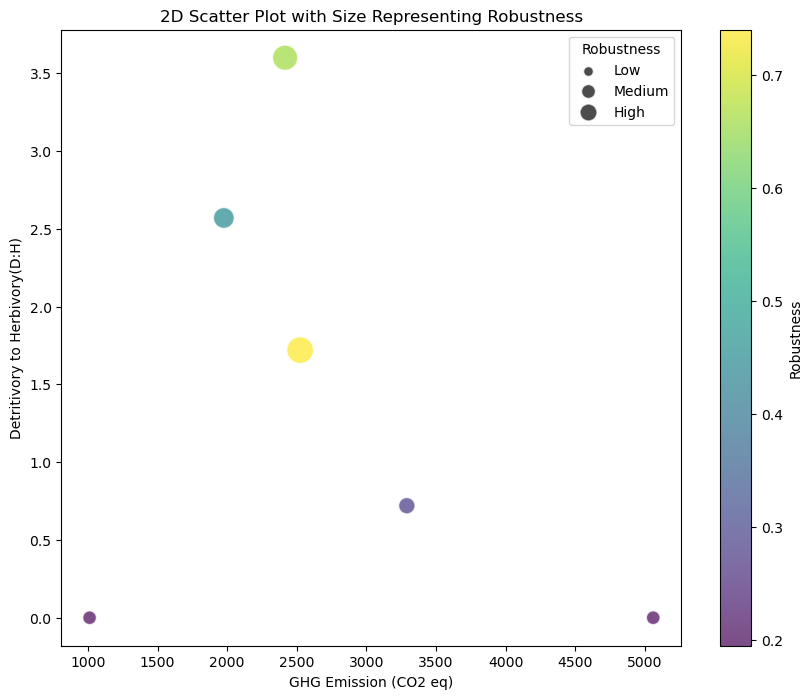

In [90]:
# Detritivory to herbivory ratio (D:H) as circularity objective
data = {
    'D:H': [0, 3.6, 2.57, 0.72, 1.72, 0],
    'ghg': [5059, 2416, 1976, 3290, 2524, 1012],
    'Robustness': [0.196, 0.66, 0.45, 0.28, 0.74, 0.195]
}

df = pd.DataFrame(data)

# Convert 'Robustness' to numeric
df['Robustness'] = pd.to_numeric(df['Robustness'], errors='coerce')

# Create a 2D scatter plot with size indicating 'Robustness'
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['ghg'], df['D:H'], s=df['Robustness']*500, c=df['Robustness'], cmap='viridis', alpha=0.7, edgecolors='w')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Robustness')

# Labels and title
plt.xlabel('GHG Emission (CO2 eq)')
plt.ylabel('Detritivory to Herbivory(D:H)')
plt.title('2D Scatter Plot with Size Representing Robustness')

# Add legend explaining the sizes
legend_labels = ['Low', 'Medium', 'High']
legend_sizes = [0.1, 0.2, 0.3]  # Adjust these sizes accordingly
legend_handles = [plt.scatter([], [], s=size*500, color='black', alpha=0.7, edgecolors='w') for size in legend_sizes]
plt.legend(legend_handles, legend_labels, title='Robustness', loc='upper right')
plt.show()


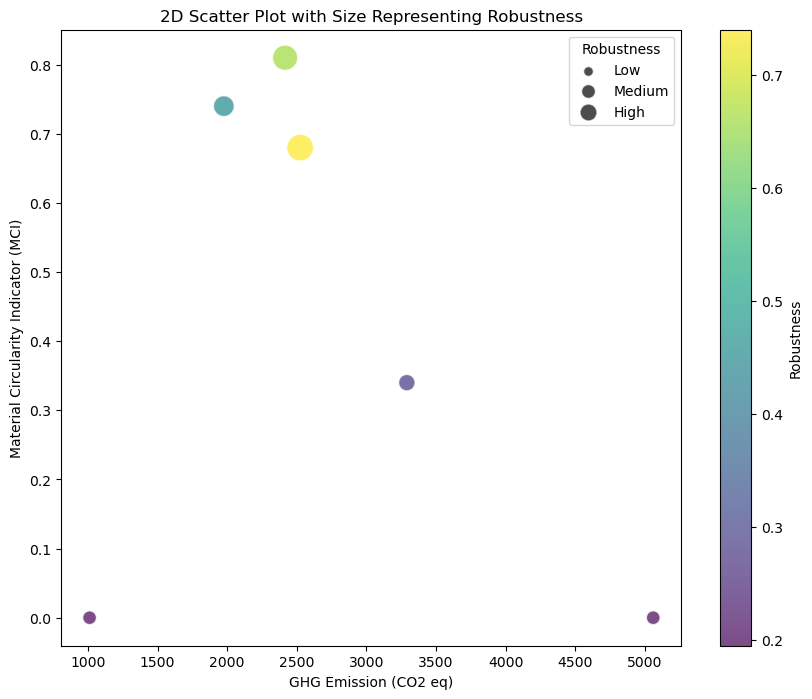

In [91]:
#Material Circularity Indicator (MCI) as circularity objective

import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'MCI': [0, 0.81, 0.74, 0.34, 0.68, 0],
    'ghg': [5059, 2416, 1976, 3290, 2524, 1012],
    'Robustness': [0.196, 0.66, 0.45, 0.28, 0.74, 0.195]
}

df = pd.DataFrame(data)

# Convert 'Robustness' to numeric
df['Robustness'] = pd.to_numeric(df['Robustness'], errors='coerce')

# Create a 2D scatter plot with size indicating 'Robustness'
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['ghg'], df['MCI'], s=df['Robustness']*500, c=df['Robustness'], cmap='viridis', alpha=0.7, edgecolors='w')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Robustness')

# Labels and title
plt.xlabel('GHG Emission (CO2 eq)')
plt.ylabel('Material Circularity Indicator (MCI)')
plt.title('2D Scatter Plot with Size Representing Robustness')

# Add legend explaining the sizes
legend_labels = ['Low', 'Medium', 'High']
legend_sizes = [0.1, 0.2, 0.3]  # Adjust these sizes accordingly
legend_handles = [plt.scatter([], [], s=size*500, color='black', alpha=0.7, edgecolors='w') for size in legend_sizes]
plt.legend(legend_handles, legend_labels, title='Robustness', loc='upper right')
plt.show()

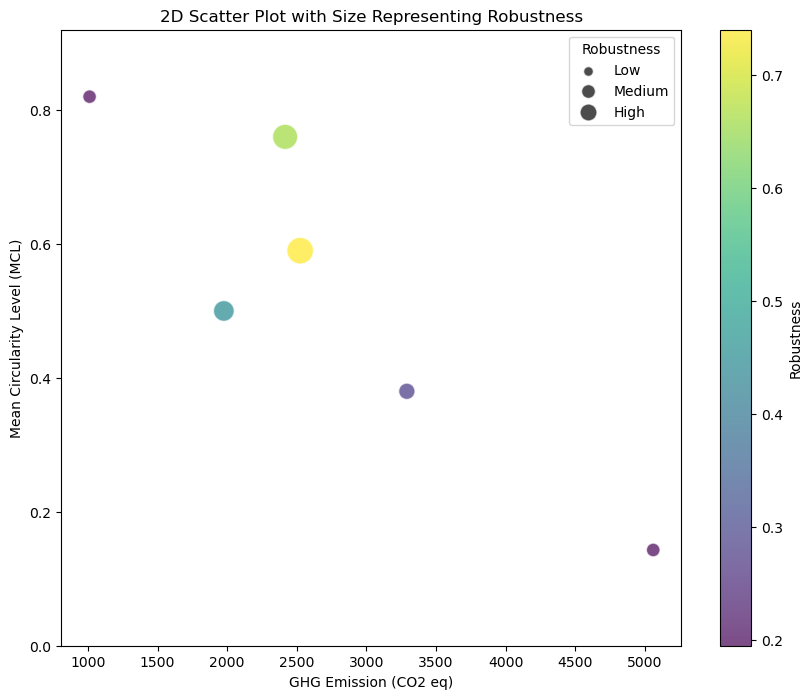

In [92]:
#Mean Circularity Level (MCL) as circularity objective
data = {
    'MCL': [0.143, 0.76, 0.5, 0.38, 0.59, 0.82],
    'ghg': [5059, 2416, 1976, 3290, 2524, 1012],
    'Robustness': [0.196, 0.66, 0.45, 0.28, 0.74, 0.195]
}

df = pd.DataFrame(data)

# Convert 'Robustness' to numeric
df['Robustness'] = pd.to_numeric(df['Robustness'], errors='coerce')

# Create a 2D scatter plot with size indicating 'Robustness'
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['ghg'], df['MCL'], s=df['Robustness']*500, c=df['Robustness'], cmap='viridis', alpha=0.7, edgecolors='w')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Robustness')

plt.ylim(0, max(df['MCL']) + 0.1)  # Adjust the upper limit accordingly

# Labels and title
plt.xlabel('GHG Emission (CO2 eq)')
plt.ylabel('Mean Circularity Level (MCL)')
plt.title('2D Scatter Plot with Size Representing Robustness')

# Add legend explaining the sizes
legend_labels = ['Low', 'Medium', 'High']
legend_sizes = [0.1, 0.2, 0.3]  # Adjust these sizes accordingly
legend_handles = [plt.scatter([], [], s=size*500, color='black', alpha=0.7, edgecolors='w') for size in legend_sizes]
plt.legend(legend_handles, legend_labels, title='Robustness', loc='upper right')
plt.show()